# 0.Load data from netCDF file

In [133]:
import xarray as xr
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import os
path = os.path.abspath('.') 
sample = xr.open_dataset(path + '/test.nc')
#sample.red.plot(col = 'time')

In [25]:
city = xr.open_dataset(path + '/city.nc')

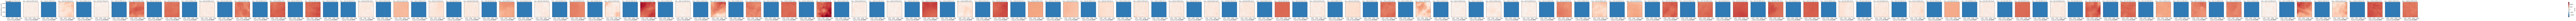

In [4]:
city.red.plot(col = 'time')

In [5]:
city

<xarray.Dataset>
Dimensions:    (latitude: 26, longitude: 27, time: 137)
Coordinates:
  * time       (time) datetime64[ns] 2015-01-07T02:26:39.138373 ... 2018-02-25T02:20:09.471796008
  * latitude   (latitude) float64 25.02 25.02 25.02 25.02 ... 25.01 25.01 25.01
  * longitude  (longitude) float64 121.5 121.5 121.5 121.5 ... 121.5 121.5 121.5
Data variables:
    red        (time, latitude, longitude) int16 ...
    green      (time, latitude, longitude) int16 ...
    blue       (time, latitude, longitude) int16 ...
    nir        (time, latitude, longitude) int16 ...
    swir1      (time, latitude, longitude) int16 ...
    swir2      (time, latitude, longitude) int16 ...
    pixel_qa   (time, latitude, longitude) uint16 ...
Attributes:
    crs:      EPSG:4326

In [6]:
wild = xr.open_dataset(path + '/wild.nc')

In [7]:
wild

<xarray.Dataset>
Dimensions:    (latitude: 17, longitude: 22, time: 137)
Coordinates:
  * time       (time) datetime64[ns] 2015-01-07T02:26:39.138373 ... 2018-02-25T02:20:09.471796008
  * latitude   (latitude) float64 24.95 24.95 24.95 24.95 ... 24.95 24.95 24.95
  * longitude  (longitude) float64 121.4 121.4 121.4 121.4 ... 121.4 121.4 121.4
Data variables:
    red        (time, latitude, longitude) int16 ...
    green      (time, latitude, longitude) int16 ...
    blue       (time, latitude, longitude) int16 ...
    nir        (time, latitude, longitude) int16 ...
    swir1      (time, latitude, longitude) int16 ...
    swir2      (time, latitude, longitude) int16 ...
    pixel_qa   (time, latitude, longitude) uint16 ...
Attributes:
    crs:      EPSG:4326

In [8]:
from utils.dc_display_map import display_map
lon = (float(sample.longitude.min().values), float(sample.longitude.max().values))
lat = (float(sample.latitude.min().values), float(sample.latitude.max().values))
display_map(latitude = lat, longitude = lon)

# 1.Data pre-process

In [9]:
from dc_hugo import cloud_free_landsat8

In [58]:
CF_sample = cloud_free_landsat8(sample).fillna(-9999)

In [11]:
CF_city = cloud_free_landsat8(city)

In [12]:
CF_wild = cloud_free_landsat8(wild)

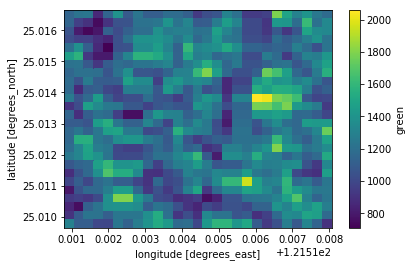

In [13]:
CF_city.green.plot()

# 2.Linear regression

In [14]:
from sklearn import preprocessing, linear_model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [59]:
from dc_hugo import dataset_to_dataframe
sample_df = dataset_to_dataframe(CF_sample)
city_df = dataset_to_dataframe(CF_city)
wild_df = dataset_to_dataframe(CF_wild)

In [30]:
city_df['label'] = 1
wild_df['label'] = 0
wild_df

,red,green,blue,nir,swir1,swir2,label
0,224.0,439.0,287.0,3003.0,1273.0,508.0,0
1,234.0,453.0,315.0,3093.0,1323.0,516.0,0
2,245.0,439.0,321.0,2826.0,1359.0,555.0,0
3,274.5,471.5,340.0,3181.5,1615.5,681.5,0
4,268.5,453.0,332.0,2923.5,1521.5,665.5,0
5,213.5,418.5,308.5,2643.0,1204.0,461.5,0
6,182.5,395.5,283.0,2563.5,1059.0,401.0,0
7,187.0,375.5,279.5,2481.0,1080.0,412.5,0
8,221.5,393.0,288.5,2813.0,1223.0,478.0,0
9,221.5,393.0,288.5,2813.0,1223.0,478.0,0


In [32]:
new = city_df.append(wild_df, ignore_index=True)
new

,red,green,blue,nir,swir1,swir2,label
0,1100.5,1142.0,825.0,1658.0,1879.5,1538.0,1
1,1217.0,1222.0,881.0,1826.0,1910.5,1527.5,1
2,1316.5,1237.5,948.5,1872.5,2086.5,1778.5,1
3,880.0,862.0,672.5,1392.0,1539.0,1297.5,1
4,1030.0,1136.0,862.0,1705.0,1889.0,1630.0,1
5,1352.0,1401.5,1042.0,1974.5,2188.0,1912.5,1
6,1253.0,1087.5,855.0,1827.5,1996.5,1719.5,1
7,1375.5,1231.0,944.5,1908.0,2235.0,1856.0,1
8,1183.5,1104.5,829.5,1543.5,1905.5,1617.5,1
9,1183.5,1104.5,829.5,1543.5,1905.5,1617.5,1


In [40]:
from sklearn.model_selection import train_test_split
y = pd.DataFrame(new['label'])
x1_train, x1_test, y1_train, y1_test = train_test_split(new.drop(['label'], axis = 1), y,test_size=0.2, random_state=42)

In [135]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 
model = LogisticRegression()
model.fit(x1_train, y1_train.values.flatten())

/Users/hugoshih/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [54]:
predicted_classes = model.predict(x1_test)
accuracy = accuracy_score(y1_test.values.flatten(),predicted_classes)
accuracy

1.0

In [79]:
sample_CL = model.predict(sample_df).reshape(CF_sample.green.values.shape)

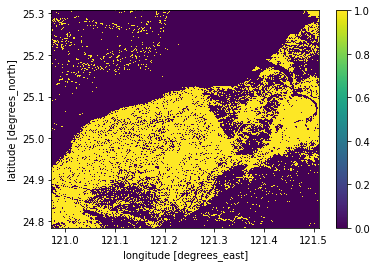

In [78]:
result = xr.DataArray(sample_CL, coords = CF_sample.coords)
result.plot()

# 3.SVM

In [115]:
from sklearn.svm import SVC
clf = SVC(gamma='auto',kernel='poly',probability=True)
clf.fit(x1_train, y1_train.values.flatten())

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

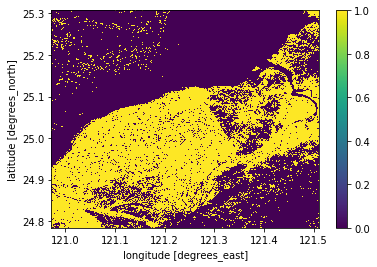

In [108]:
sample_CL_svm = clf.predict(sample_df).reshape(CF_sample.green.values.shape)
result_svm = xr.DataArray(sample_CL_svm, coords = CF_sample.coords)
result_svm.plot()

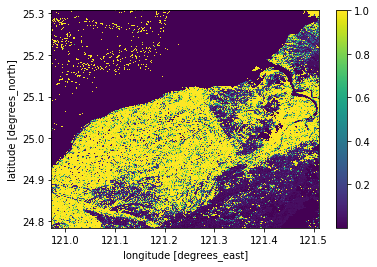

In [126]:
xr.DataArray(pd.DataFrame(clf.predict_proba(sample_df))[1].
             values.reshape(CF_sample.green.values.shape), coords = CF_sample.coords).plot()

# 4.Random forest

In [129]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
tree = DecisionTreeClassifier()
#通過每個估計器擬合80％的訓練點
rf = BaggingClassifier(tree, n_estimators=100, max_samples=0.8,
                        random_state=1)
rf.fit(x1_train, y1_train.values.flatten())

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=0.8, n_estimators=100, n_jobs=None, oob_score=False,
         random_state=1, verbose=0, warm_start=False)

In [130]:
sample_CL_rf = rf.predict(sample_df).reshape(CF_sample.green.values.shape)

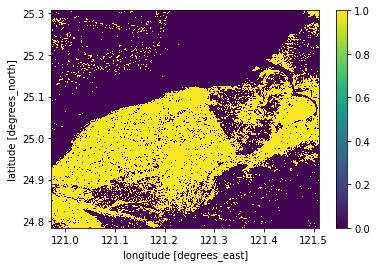

In [132]:
xr.DataArray(sample_CL_rf, coords = CF_sample.coords).plot()

# 5.K-mean

In [136]:
from sklearn import cluster
kmeans_fit = cluster.KMeans(n_clusters = 4).fit(sample_df)

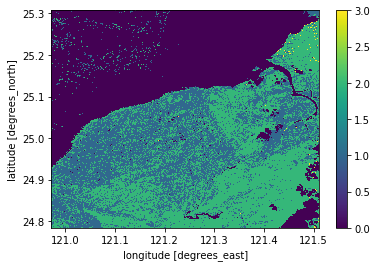

In [138]:
xr.DataArray(kmeans_fit.labels_.reshape(CF_sample.green.values.shape), coords = CF_sample.coords).plot()